In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_22780\4082257325.py:32: RuntimeWarning: covariance is not positive-semidefinite.
  class2_data = np.random.multivariate_normal(mean_class2 , cov_class2 , num_samples)


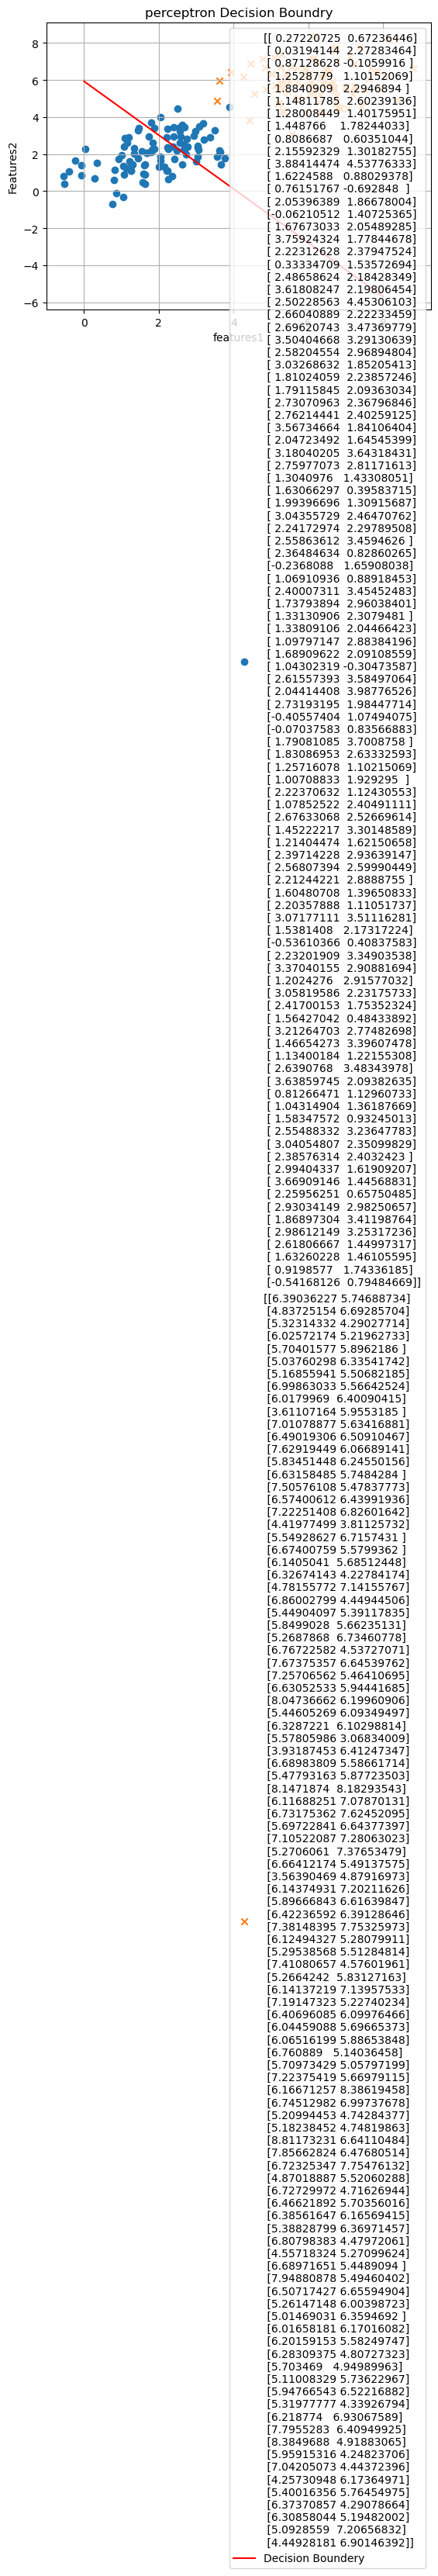

In [17]:
# define the perceptron class 

class Perceptron :
    def __init__(self,input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = 0.1
        
    def activation(self, x):
        return 1 if  x>=0 else 0 
    
    def predict(self,inputs):
        weighted_sum =np.dot(inputs,self.weights)+ self.bias
        return self.activation(weighted_sum)
    
    def train(self, training_data , labels ,epochs):
        for i in range(epochs):
            for j in range(len(training_data)):
                prediction = self.predict(training_data[j])
                error = labels[j]-prediction
                self.weights +=self.learning_rate *error*training_data[j]
                self.bias += self.learning_rate *error
                

np.random.seed(0)
num_samples=100
mean_class1 =[2,2]
cov_class1 = [[1,0.5], [0.5,1]]
class1_data = np.random.multivariate_normal(mean_class1,cov_class1 , num_samples)
mean_class2 = [6,6]
cov_class2 = [[1,0.5],[-0.5, 1]]
class2_data = np.random.multivariate_normal(mean_class2 , cov_class2 , num_samples)


# combine of data 
data = np.vstack((class1_data,  class2_data))
lables = np.hstack((np.zeros(num_samples),np.ones(num_samples)))

# data 
#create a perceptron for 2D data (2 input_feature)
perceptron =Perceptron(input_size = 2)

# train the model
perceptron.train(data,lables,epochs=100)

# visualize the decision boundery 
plt.scatter(class1_data[:,0],class1_data[:,1], marker ='o',label= class1_data)
plt.scatter(class2_data[:,0],class2_data[:,1], marker ='x',label= class2_data)

# create a line for the decision boundry
x_values = np.linspace(0,8,100)
y_values = -(perceptron.weights[0]*x_values + perceptron.bias)/perceptron.weights[1]
plt.plot(x_values,y_values , label = 'Decision Boundery', color = 'red')

plt.xlabel ('features1')
plt.ylabel('Features2')
plt.legend()
plt.title('perceptron Decision Boundry')
plt.grid(True)
plt.show()
